# DL3-IRF Validation and Testing

Simple plotting routines to valide IRFs and compare to other files.

Hardwired IRF files for plotting.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import QTable
import astropy.units as u

In [4]:
%matplotlib inline

In [5]:
datadir='/Users/maierg/DESYCloud/Eventdisplay/Git/Converters/DL3-IRFs/data/'
#datadir='./'
# test file
rf_file = datadir+'test.fits'
# ctools-converted file
ct_file = datadir+'Prod5-Paranal-MST3SST3-20deg-S-M6C5-14MSTs40SSTs-MSTF.180000s-IRFv01.fits'
# py IRF file
py_file = datadir+'4LSTs25MSTs70SSTs-MSTF_pyirf_eventdisplay.fits.gz'

In [6]:
plt.rcParams['figure.figsize'] = (9,6)

# EDisp

In [7]:
rf_edisp = QTable.read(rf_file, hdu='ENERGY DISPERSION')[0]
ct_edisp = QTable.read(ct_file, hdu='ENERGY DISPERSION')[0]
py_edisp = QTable.read(py_file, hdu='ENERGY_DISPERSION')[0]

In [8]:
rf_edisp

ENERG_LO [60],ENERG_HI [60],MIGRA_LO [300],MIGRA_HI [300],THETA_LO [6],THETA_HI [6],"MATRIX [6,300,60]"
TeV,TeV,,,deg,deg,
float32,float32,float32,float32,float32,float32,float32
0.009999999776482582 .. 7943.2822265625,0.012589254416525364 .. 10000.0,0.0 .. 2.99,0.01 .. 3.0,0.0 .. 5.0,1.0 .. 6.0,0.0 .. 0.0


In [9]:
ct_edisp

ENERG_LO [500],ENERG_HI [500],MIGRA_LO [300],MIGRA_HI [300],THETA_LO [6],THETA_HI [6],"MATRIX [6,300,500]"
TeV,TeV,,,deg,deg,
float32,float32,float32,float32,float32,float32,float32
0.005011872388422489 .. 489.77880859375,0.005128613673150539 .. 501.1872253417969,0.0 .. 2.99,0.01 .. 3.0,0.0 .. 5.0,1.0 .. 6.0,0.0 .. 0.0


In [10]:
py_edisp

ENERG_LO [44],ENERG_HI [44],MIGRA_LO [199],MIGRA_HI [199],THETA_LO [1],THETA_HI [1],"MATRIX [1,199,44]"
TeV,TeV,,,deg,deg,
float64,float64,float64,float64,float64,float64,float64
0.0 .. 199.52623149688972,0.012589254117941675 .. inf,0.20000000000000004 .. 4.919774307697081,0.2032613566105016 .. 5.000000000000001,0.0,0.5,0.0 .. 0.0


Text(0, 0.5, '$E_\\mathrm{Reco} / E_\\mathrm{True}$')

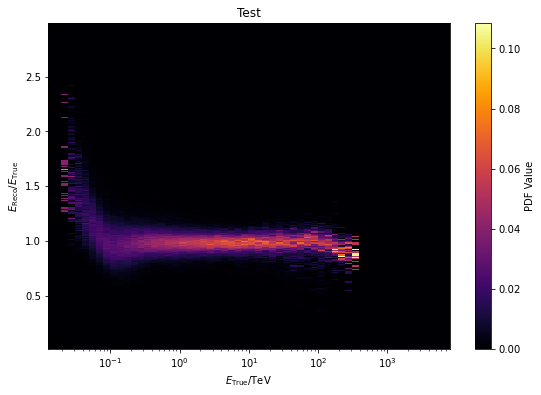

In [11]:
e_bins = rf_edisp['ENERG_LO'][1:]
migra_bins = rf_edisp['MIGRA_LO'][1:]
edisp_matrix = rf_edisp['MATRIX'].T[1:-1, 1:-1, 0]

plt.title('Test')
plt.pcolormesh(e_bins.to_value(u.TeV), migra_bins, edisp_matrix.T, cmap='inferno')

plt.xscale('log')
#plt.yscale('log')
plt.colorbar(label='PDF Value')

plt.xlabel(r'$E_\mathrm{True} / \mathrm{TeV}$')
plt.ylabel(r'$E_\mathrm{Reco} / E_\mathrm{True}$')

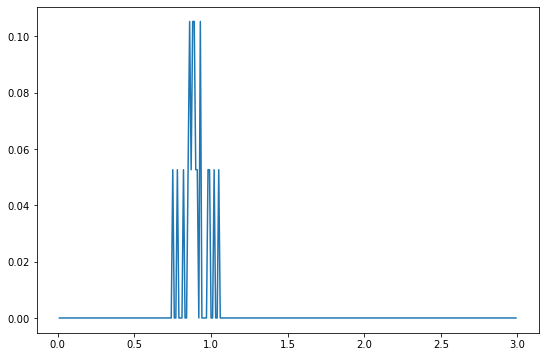

In [12]:
plt.plot(migra_bins,rf_edisp['MATRIX'][0, :-1, 45])

In [13]:
rf_edisp['MATRIX'].shape

(6, 300, 60)

Text(0, 0.5, '$E_\\mathrm{Reco} / E_\\mathrm{True}$')

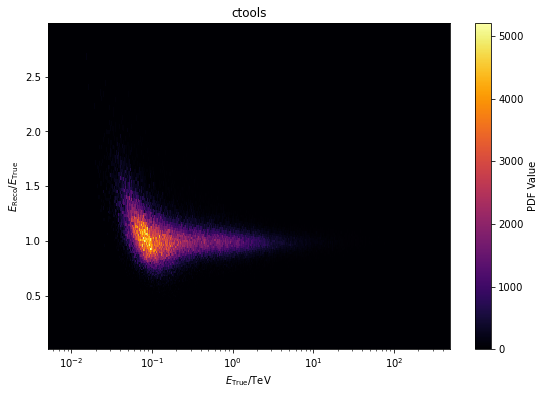

In [14]:
e_bins = ct_edisp['ENERG_LO'][1:]
migra_bins = ct_edisp['MIGRA_LO'][1:]
edisp_matrix = ct_edisp['MATRIX'].T[1:-1, 1:-1, 0]

plt.title('ctools')
plt.pcolormesh(e_bins.to_value(u.TeV), migra_bins, edisp_matrix.T, cmap='inferno')

plt.xscale('log')
#plt.yscale('log')
plt.colorbar(label='PDF Value')

plt.xlabel(r'$E_\mathrm{True} / \mathrm{TeV}$')
plt.ylabel(r'$E_\mathrm{Reco} / E_\mathrm{True}$')

Text(0, 0.5, '$E_\\mathrm{Reco} / E_\\mathrm{True}$')

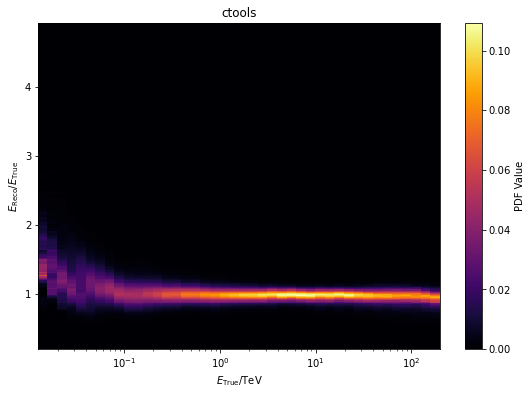

In [15]:
e_bins = py_edisp['ENERG_LO'][1:]
migra_bins = py_edisp['MIGRA_LO'][1:]
edisp_matrix = py_edisp['MATRIX'].T[1:-1, 1:-1, 0]

plt.title('ctools')
plt.pcolormesh(e_bins.to_value(u.TeV), migra_bins, edisp_matrix.T, cmap='inferno')

plt.xscale('log')
#plt.yscale('log')
plt.colorbar(label='PDF Value')

plt.xlabel(r'$E_\mathrm{True} / \mathrm{TeV}$')
plt.ylabel(r'$E_\mathrm{Reco} / E_\mathrm{True}$')

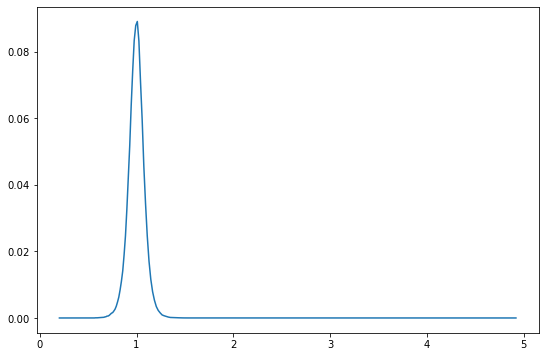

In [16]:
plt.plot(migra_bins,py_edisp['MATRIX'][0, :-1, 20])

In [17]:
rf_edisp['MATRIX'].shape

(6, 300, 60)

# PSF

In [18]:
rf_pst = QTable.read(rf_file, hdu='POINT SPREAD FUNCTION')[0]
ct_pst = QTable.read(ct_file, hdu='POINT SPREAD FUNCTION')[0]

Text(0, 0.5, '$\\sigma_1$ (deg)')

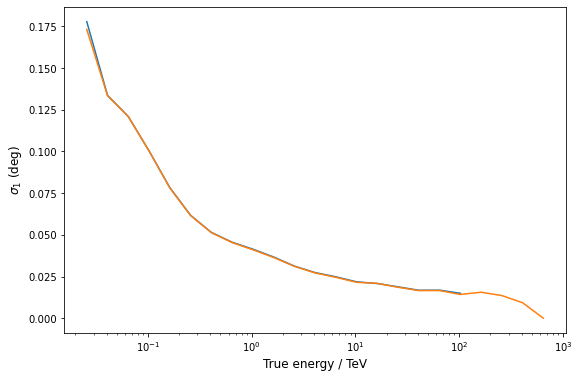

In [19]:
plt.plot(
    0.5 * (rf_pst['ENERG_LO'] + rf_pst['ENERG_HI']).to_value(u.TeV)[1:-1],
    rf_pst['SIGMA_1'].T[1:-1, 0],
    label='rf '
)
plt.plot(
0.5 * (ct_pst['ENERG_LO'] + ct_pst['ENERG_HI']).to_value(u.TeV)[1:-1],
ct_pst['SIGMA_1'].T[1:-1, 0],
label='rf '
)
plt.xscale("log")
plt.xlabel("True energy / TeV",fontsize=12)
plt.ylabel("$\sigma_1$ (deg)",fontsize=12)

Text(0, 0.5, 'scale ($sr^{-1}$)')

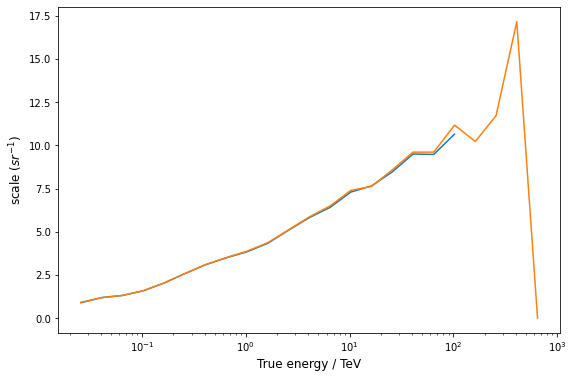

In [22]:
plt.plot(
    0.5 * (rf_pst['ENERG_LO'] + rf_pst['ENERG_HI']).to_value(u.TeV)[1:-1],
    rf_pst['SCALE'].T[1:-1, 0],
    label='rf '
)
plt.plot(
0.5 * (ct_pst['ENERG_LO'] + ct_pst['ENERG_HI']).to_value(u.TeV)[1:-1],
ct_pst['SCALE'].T[1:-1, 0],
label='rf '
)
plt.xscale("log")
plt.xlabel("True energy / TeV",fontsize=12)
plt.ylabel("scale ($sr^{-1}$)",fontsize=12)

# PSF (3D)

In [23]:
rf_psf3d = QTable.read(py_file, hdu='PSF')[0]

In [24]:
rf_psf3d['RPSF'].T[1:-1, 1:-1, 0]

<Quantity [] 1 / sr>

TypeError: Dimensions of C (0, 42) are incompatible with X (43) and/or Y (999); see help(pcolormesh)

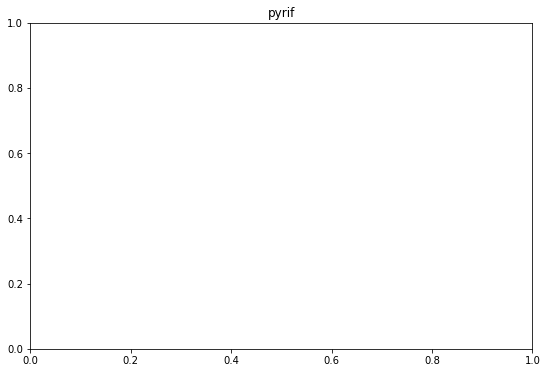

In [25]:
e_bins = rf_psf3d['ENERG_LO'][1:]
migra_bins = rf_psf3d['RAD_LO'][1:]
psfdisp_matrix = rf_psf3d['RPSF'].T[1:-1, 1:-1, 0]

plt.title('pyrif')
plt.pcolormesh(e_bins.to_value(u.TeV), migra_bins, psfdisp_matrix.T, cmap='inferno')


plt.xscale('log')
#plt.yscale('log')
plt.colorbar(label='PDF Value')

plt.xlabel(r'$E_\mathrm{True} / \mathrm{TeV}$')
plt.ylabel(r'$E_\mathrm{Reco} / E_\mathrm{True}$')

# BCK rate

In [26]:
rf_bck = QTable.read(rf_file, hdu='BACKGROUND')[0]
ct_bck = QTable.read(ct_file, hdu='BACKGROUND')[0]
py_bck = QTable.read(py_file, hdu='BACKGROUND')[0]

In [27]:
py_bck

ENERG_LO [23],ENERG_HI [23],THETA_LO [10],THETA_HI [10],"BKG [10,23]"
TeV,TeV,deg,deg,1 / (MeV s sr)
float64,float64,float64,float64,float64
0.0 .. 199.52623149688768,0.012589254117941675 .. inf,0.0 .. 9.0,1.0 .. 10.0,0.06989011994498333 .. 0.0


In [28]:
rf_bck

ENERG_LO [21],ENERG_HI [21],THETA_LO [6],THETA_HI [6],"BKG [6,21]"
TeV,TeV,deg,deg,1 / (MeV s sr)
float32,float32,float32,float32,float32
0.012589254416525364 .. 125.89253997802734,0.019952623173594475 .. 199.52622985839844,0.0 .. 5.0,1.0 .. 6.0,0.0 .. 3.4114036040477913e-09


Text(0, 0.5, 'background rate ($s{^-1} MeV{^-1} sr^{-1}$)')

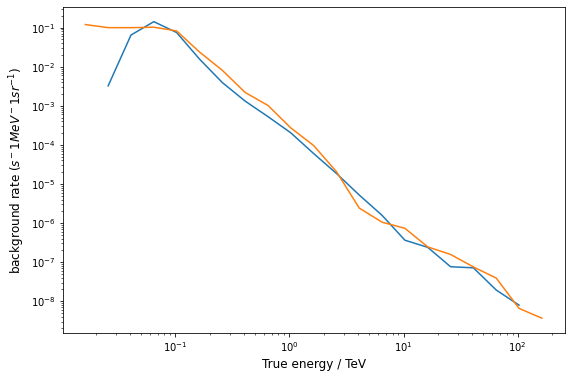

In [29]:
plt.plot(
    0.5 * (rf_bck['ENERG_LO'] + rf_bck['ENERG_HI']).to_value(u.TeV)[1:-1],
    rf_bck['BKG'].T[1:-1, 0],
    label='rf '
)
plt.plot(
0.5 * (py_bck['ENERG_LO'] + py_bck['ENERG_HI']).to_value(u.TeV)[1:-1],
py_bck['BKG'].T[1:-1,0],
label='rf '
)
plt.xscale("log")
plt.yscale("log")
plt.xlabel("True energy / TeV",fontsize=12)
plt.ylabel("background rate ($s{^-1} MeV{^-1} sr^{-1}$)",fontsize=12)

In [30]:
ct_bck['BKG']

<Quantity [[[0., 0., 0., ..., 0., 0., 0.],
            [0., 0., 0., ..., 0., 0., 0.],
            [0., 0., 0., ..., 0., 0., 0.],
            ...,
            [0., 0., 0., ..., 0., 0., 0.],
            [0., 0., 0., ..., 0., 0., 0.],
            [0., 0., 0., ..., 0., 0., 0.]],

           [[0., 0., 0., ..., 0., 0., 0.],
            [0., 0., 0., ..., 0., 0., 0.],
            [0., 0., 0., ..., 0., 0., 0.],
            ...,
            [0., 0., 0., ..., 0., 0., 0.],
            [0., 0., 0., ..., 0., 0., 0.],
            [0., 0., 0., ..., 0., 0., 0.]],

           [[0., 0., 0., ..., 0., 0., 0.],
            [0., 0., 0., ..., 0., 0., 0.],
            [0., 0., 0., ..., 0., 0., 0.],
            ...,
            [0., 0., 0., ..., 0., 0., 0.],
            [0., 0., 0., ..., 0., 0., 0.],
            [0., 0., 0., ..., 0., 0., 0.]],

           ...,

           [[0., 0., 0., ..., 0., 0., 0.],
            [0., 0., 0., ..., 0., 0., 0.],
            [0., 0., 0., ..., 0., 0., 0.],
            ...,
      

# Effective area

In [31]:
rf_eff = QTable.read(rf_file, hdu='EFFECTIVE AREA')[0]
ct_eff = QTable.read(ct_file, hdu='EFFECTIVE AREA')[0]

Text(0, 0.5, 'Effective area (m2)')

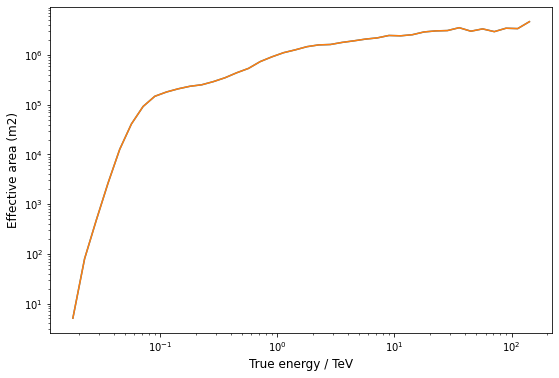

In [32]:
plt.plot(
    0.5 * (rf_eff['ENERG_LO'] + rf_eff['ENERG_HI']).to_value(u.TeV)[1:-1],
    rf_eff['EFFAREA'].T[1:-1, 0],
    label='rf '
)
plt.plot(
0.5 * (ct_eff['ENERG_LO'] + ct_eff['ENERG_HI']).to_value(u.TeV)[1:-1],
ct_eff['EFFAREA'].T[1:-1, 0],
label='rf '
)
plt.xscale("log")
plt.yscale("log")
plt.xlabel("True energy / TeV",fontsize=12)
plt.ylabel("Effective area (m2)",fontsize=12)